In [1]:
import matplotlib.pyplot as plt

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

To get an overview of the methods we are going to see today, you can watch this video of Machine learnia about Ensemble learning : https://www.youtube.com/watch?v=7C_YpudYtw8 (you don't need to understand everything before beginning the notebook ;)).

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [2]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [3]:
# code here
df = pd.read_csv('../data/bank-full.csv', sep=';')
y = df['y']
df = df.drop('y', axis=1)

Describe the dataset informations

In [4]:
# code here
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


Use histogramms to display the features' distribution

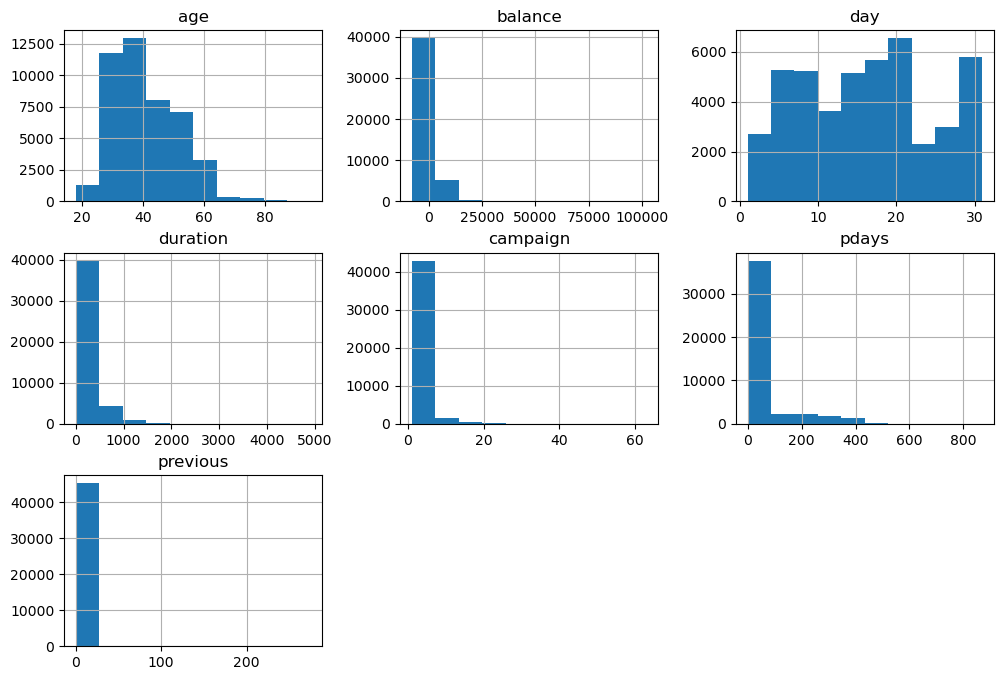

In [7]:
# code here
df.hist(figsize=(12,8))
plt.show()

Use heatmap to display the numerical features' correlation

<Axes: >

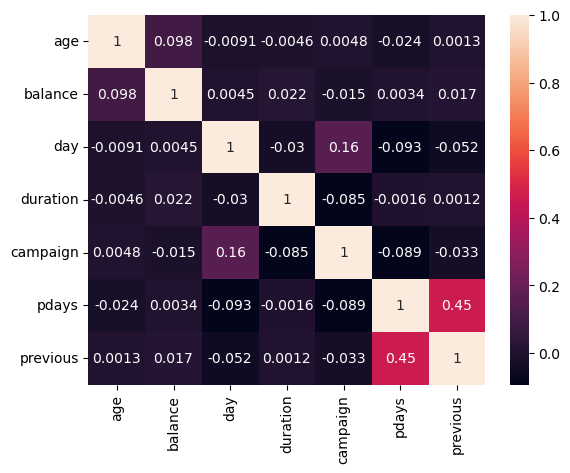

In [8]:
# code here
import seaborn as sns

sns.heatmap(df.select_dtypes(exclude=object).corr(), annot=True, fmt='.2g')

Hop hop hop!!! Not to fast!! Before processing data for machine learning, do you think that all the data are useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 

In [9]:
# remove duration column
df = df.drop('duration', axis=1)

The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the proper hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe it is a good hypothesis, maybe not. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`. 

You can use pandas datetime tools or python **datetime** librairies for doing this preprocessing. To find the the day of year, look as *dayofyear* method from **datetime** library and examples such as https://pythonguides.com/extract-day-number-of-the-year-from-a-date-in-python/ or https://docs.lucee.org/reference/functions/dayofyear.html
(the default year used will be 1984)

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown


In [11]:
#code here
# You can concatenate multiple Series containing string by just summing them.
# However, be sure each Serie contains string, in case use .astype(str)
import datetime

df['dayoftheyear'] = pd.to_datetime('1984' + '-' + df['month'] + '-' + df['day'].astype(str), format='%Y-%b-%d')
df['dayoftheyear'] = df['dayoftheyear'].dt.dayofyear.astype(int)
df = df.drop(columns=['month', 'day'], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,126
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,126
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,126
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,126
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,126


We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. 

Now sort the features into categorical and numerical features

In [12]:
df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
campaign        0
pdays           0
previous        0
poutcome        0
dayoftheyear    0
dtype: int64

In [13]:
df.nunique()

age               77
job               12
marital            3
education          4
default            2
balance         7168
housing            2
loan               2
contact            3
campaign          48
pdays            559
previous          41
poutcome           4
dayoftheyear     318
dtype: int64

In [14]:
df.select_dtypes(include=object).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')

In [15]:
df.select_dtypes(exclude=object).columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear'], dtype='object')

In [16]:
 # to be completed
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'poutcome']

numerical_features = ['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear'] 

After a first exploration, categorical/ordinal features (8 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/api/sklearn.preprocessing.html).

(You can also use the function `gethg_dummies` of pandas for categorical features)

In [17]:
# Create the X and y DataFrames resample the dataframes if necessary
from sklearn.model_selection import train_test_split
y = y.map({'yes': 1, 'no': 0})

# train_test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

In [18]:
# import and create the appropriate transformers 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

# Fusion dans un seul transformateur
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it means a pipeline easy to use and evaluate.
2. A model, that performs well.

### Dummy Classifier

It is always a good idea to begin with a dummy model as a baseline

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score

# Code here to get dummy classifier F1score and accuracy

model_d = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])

model_d.fit(X_train, y_train)
y_pred_test = model_d.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy score:', accuracy)
f1 = f1_score(y_test, y_pred_test)
print('F1 score:', f1)

Accuracy score: 0.8802972662125099
F1 score: 0.0


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [20]:
# Decision tree model creation and tree visualization
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# train_test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=41)


model_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=3))
])

model_dt.fit(X_train, y_train)
y_pred_test = model_dt.predict(X_test)

In [21]:
model_dt.named_steps['preprocessing'].get_feature_names_out()

array(['num__age', 'num__balance', 'num__campaign', 'num__pdays',
       'num__previous', 'num__dayoftheyear', 'cat__job_admin.',
       'cat__job_blue-collar', 'cat__job_entrepreneur',
       'cat__job_housemaid', 'cat__job_management', 'cat__job_retired',
       'cat__job_self-employed', 'cat__job_services', 'cat__job_student',
       'cat__job_technician', 'cat__job_unemployed', 'cat__job_unknown',
       'cat__marital_divorced', 'cat__marital_married',
       'cat__marital_single', 'cat__education_primary',
       'cat__education_secondary', 'cat__education_tertiary',
       'cat__education_unknown', 'cat__default_yes', 'cat__housing_yes',
       'cat__loan_yes', 'cat__contact_cellular', 'cat__contact_telephone',
       'cat__contact_unknown', 'cat__poutcome_failure',
       'cat__poutcome_other', 'cat__poutcome_success',
       'cat__poutcome_unknown'], dtype=object)

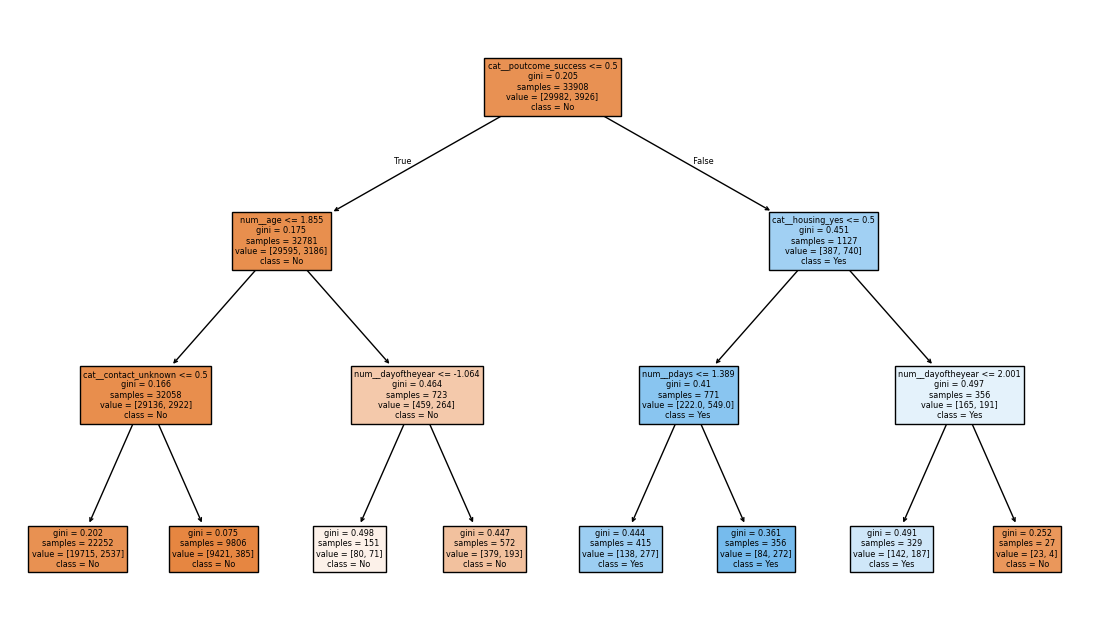

In [22]:
fig, ax = plt.subplots(figsize=(14,8))
tree.plot_tree(model_dt.named_steps['classifier'], 
               feature_names=model_dt.named_steps['preprocessing'].get_feature_names_out(), 
               class_names=['No', 'Yes'], filled=True, ax=ax)
plt.show()

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [23]:
# create a new train and test dataset with a different seed
# train_test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=1000)

model_dt.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


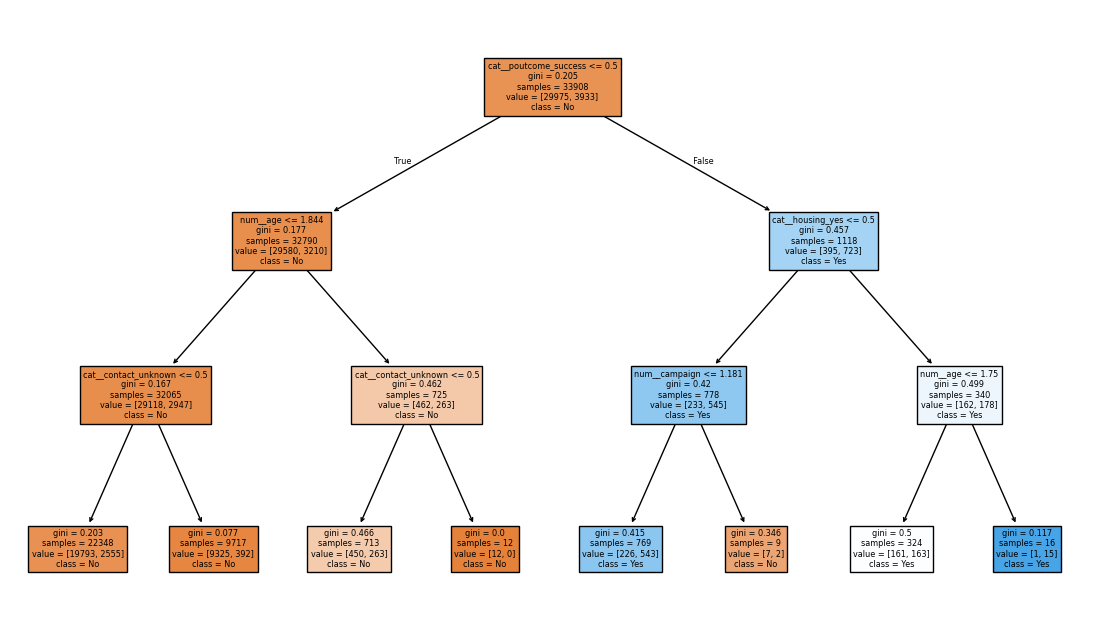

In [24]:
# Second tree creation
fig, ax = plt.subplots(figsize=(14,8))
tree.plot_tree(model_dt.named_steps['classifier'], 
               feature_names=model_dt.named_steps['preprocessing'].get_feature_names_out(), 
               class_names=['No', 'Yes'], filled=True, ax=ax)
plt.show()

What can you tell about the two trees?

The trees are slightly different and the choice for how a node is split changes between the trees. Also, we see that there are a lot more people who are not subscribed to a term deposit than people who are subscribed to a term deposit. The left hand side of the trees predicts people who are not subscribed to a term deposit and the right hand side of the trees predict people who are subscribed to a term deposit (with the exception of one leaf). 

Normally, before creating a model, one or more evaluation metrics should be chosen depending on the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [25]:
# Test if the target is balanced
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

no, the target is not balanced

In [26]:
from sklearn.metrics import (precision_score, recall_score, accuracy_score, 
                             f1_score, average_precision_score, roc_auc_score)

In [27]:
# Cross validation on Decision trees
from sklearn.model_selection import cross_val_score, cross_validate

metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 
           'f1', 'average_precision', 'roc_auc']

cv_scores = cross_validate(model_dt, X_train, y_train, cv=10, scoring=metrics)

In [28]:
df_cv = pd.DataFrame(cv_scores, columns =cv_scores.keys())
df_cv = df_cv.drop(['fit_time', 'score_time'], axis=1)
df_cv = df_cv.reindex(df_cv.mean().sort_values(ascending=False).index, axis=1)
df_cv

,test_accuracy,test_roc_auc,test_precision,test_balanced_accuracy,test_average_precision,test_f1,test_recall
0,0.890003,0.674779,0.615385,0.565227,0.243751,0.230928,0.142132
1,0.891477,0.679886,0.703125,0.553937,0.260361,0.196507,0.114213
2,0.892067,0.693188,0.629630,0.579621,0.272077,0.270916,0.172589
3,0.890003,0.672580,0.584746,0.579614,0.241618,0.270059,0.175573
4,0.896196,0.684679,0.681416,0.591960,0.282603,0.304348,0.195929
5,0.893247,0.671306,0.639640,0.583660,0.280207,0.281746,0.180662
6,0.896196,0.704490,0.735632,0.577589,0.317265,0.266667,0.162850
7,0.900324,0.692078,0.739130,0.603139,0.306579,0.334646,0.216285
8,0.890560,0.653537,0.627907,0.563364,0.239532,0.225470,0.137405
9,0.889971,0.677477,0.608696,0.565241,0.249086,0.230928,0.142494


Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Bonus : Plot your metrics performance

In [29]:
df_cv_stats = pd.concat([df_cv.mean(), df_cv.std()], axis=1, keys = ['Mean', 'Std'])
df_cv_stats

,Mean,Std
test_accuracy,0.893004,0.003503
test_roc_auc,0.680400,0.014159
test_precision,0.656531,0.054602
test_balanced_accuracy,0.576335,0.014741
test_average_precision,0.269308,0.027462
test_f1,0.261221,0.041063
test_recall,0.164013,0.030490


<Axes: >

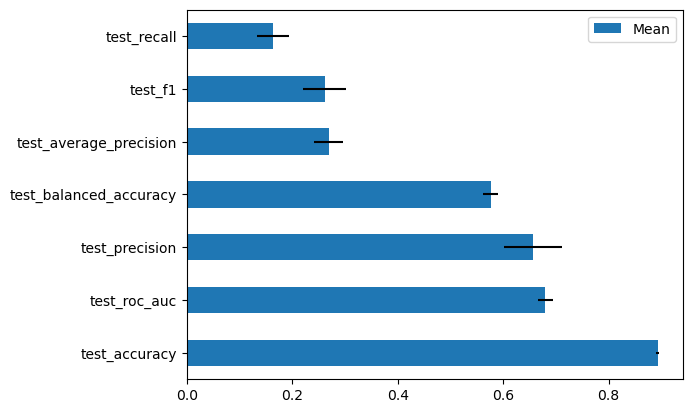

In [30]:
# BONUS: performance plot 
# Create a bar plot showing the mean and the standard deviation for each metric
df_cv_stats.plot(kind='barh', y='Mean', xerr='Std')

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [31]:
# Grid search
from sklearn.model_selection import GridSearchCV

depth = range(1,50)
param_grid =  {'classifier__max_depth': depth}

#TOFILL
gs_dt = GridSearchCV(estimator=model_dt, 
                     param_grid=param_grid, 
                     scoring = 'roc_auc',
                     n_jobs = -1,
                     cv = 5
                    )

gs_dt.fit(X_train, y_train)

,estimator,Pipeline(step...ax_depth=3))])
,param_grid,"{'classifier__max_depth': range(1, 50)}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [32]:
gs_dt_results = pd.DataFrame(gs_dt.cv_results_).sort_values('rank_test_score')
gs_dt_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.824965,0.113555,0.169816,0.060078,7,{'classifier__max_depth': 7},0.738371,0.748175,0.740349,0.741025,0.720897,0.737763,0.009062,1
7,1.199826,0.284558,0.140407,0.075195,8,{'classifier__max_depth': 8},0.741029,0.738866,0.746423,0.742997,0.715421,0.736947,0.011046,2
5,0.354751,0.095221,0.078194,0.052458,6,{'classifier__max_depth': 6},0.737318,0.748830,0.734834,0.734944,0.713089,0.733803,0.011572,3
8,1.211407,0.142753,0.108882,0.043292,9,{'classifier__max_depth': 9},0.741182,0.738208,0.729454,0.723645,0.714681,0.729434,0.009656,4
9,0.502209,0.102154,0.051958,0.002900,10,{'classifier__max_depth': 10},0.743155,0.723234,0.719937,0.713694,0.721169,0.724238,0.009980,5
4,0.337767,0.037741,0.049908,0.005307,5,{'classifier__max_depth': 5},0.720194,0.734469,0.717402,0.735714,0.703048,0.722165,0.012058,6
10,0.581945,0.143284,0.063653,0.008579,11,{'classifier__max_depth': 11},0.731983,0.710875,0.710612,0.708338,0.703655,0.713093,0.009794,7
11,0.534450,0.085739,0.061021,0.006973,12,{'classifier__max_depth': 12},0.713479,0.704977,0.708051,0.687318,0.687307,0.700226,0.010890,8
3,0.264891,0.010161,0.054353,0.009629,4,{'classifier__max_depth': 4},0.688608,0.718955,0.682855,0.702578,0.671401,0.692879,0.016456,9
12,0.505600,0.010233,0.065510,0.008419,13,{'classifier__max_depth': 13},0.699870,0.701440,0.679778,0.678906,0.671758,0.686350,0.012017,10


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [33]:
# Test metrics
y_test_proba = gs_dt.predict_proba(X_test)[:,1]

print('ROC AUC Score:', roc_auc_score(y_test, y_test_proba))

ROC AUC Score: 0.738371332664894


What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

The accuracy is very high, but the model does not perform extremely well when looking at precision, recall, and the f1 score. Also, the standard deviation for precision, recall, and f1 score are very high.

I think looking at the ensembles will decrease the standard deviation in these measures.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [79]:
# train_test split (you can copy paste the previously declared cell)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [80]:
# gridsearch for the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced_subsample'))
])

depth = range(1,25)
n_ins = range(10,141,20)
param_grid =  {'classifier__max_depth': depth,
               'classifier__n_estimators': n_ins}

gs_rf = GridSearchCV(estimator=model_rf, 
                     param_grid=param_grid, 
                     scoring = 'roc_auc',
                     n_jobs = -1,
                     cv = 5
                    )

gs_rf.fit(X_train, y_train)

,estimator,Pipeline(step...subsample'))])
,param_grid,"{'classifier__max_depth': range(1, 25), 'classifier__n_estimators': range(10, 141, 20)}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [82]:
gs_rf_results = pd.DataFrame(gs_rf.cv_results_).sort_values('rank_test_score')
gs_rf_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
66,4.403247,0.234731,0.176592,0.083997,10,70,"{'classifier__max_depth': 10, 'classifier__n_e...",0.781048,0.792011,0.787169,0.783011,0.778734,0.784395,0.004709,1
60,3.825114,0.178449,0.130655,0.004925,9,90,"{'classifier__max_depth': 9, 'classifier__n_es...",0.783384,0.793084,0.786460,0.779606,0.777579,0.784022,0.005468,2
65,3.761150,0.480542,0.105597,0.005999,10,50,"{'classifier__max_depth': 10, 'classifier__n_e...",0.782926,0.794381,0.784566,0.779314,0.777328,0.783703,0.005921,3
68,11.338596,1.675667,0.599182,0.345281,10,110,"{'classifier__max_depth': 10, 'classifier__n_e...",0.783286,0.791829,0.789815,0.779361,0.773971,0.783652,0.006590,4
75,7.762743,0.921271,0.231136,0.046501,11,110,"{'classifier__max_depth': 11, 'classifier__n_e...",0.782716,0.792025,0.789658,0.778563,0.774640,0.783520,0.006543,5
62,5.892706,0.432861,0.193400,0.062330,9,130,"{'classifier__max_depth': 9, 'classifier__n_es...",0.782235,0.790820,0.788054,0.781083,0.774432,0.783325,0.005724,6
64,1.426454,0.084737,0.076805,0.002555,10,30,"{'classifier__max_depth': 10, 'classifier__n_e...",0.781739,0.795426,0.784858,0.781558,0.771632,0.783043,0.007625,7
69,10.160644,1.175494,0.318555,0.125254,10,130,"{'classifier__max_depth': 10, 'classifier__n_e...",0.781877,0.792604,0.786417,0.780788,0.773067,0.782951,0.006461,8
73,4.661940,0.679512,0.124638,0.010318,11,70,"{'classifier__max_depth': 11, 'classifier__n_e...",0.783339,0.788432,0.787027,0.780307,0.774657,0.782753,0.004948,9
61,4.538845,0.252191,0.151707,0.015154,9,110,"{'classifier__max_depth': 9, 'classifier__n_es...",0.781930,0.789873,0.786539,0.781660,0.773031,0.782606,0.005680,10


In [ ]:
gs_rf_results = pd.read_csv('day2_ensemble.csv')
gs_rf_results.head(10)

How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

I chose to use 50 estimators because the fit time was lower but the performance was still high.

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [86]:
# Test metrics
rf_clf = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=10, n_estimators=50, class_weight='balanced_subsample'))
])

rf_clf.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [87]:
y_test_proba = rf_clf.predict_proba(X_test)[:,1]

print('ROC AUC Score:', roc_auc_score(y_test, y_test_proba))

ROC AUC Score: 0.7786298825985063


#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

In [88]:
import numpy as np

importances = rf_clf.named_steps['classifier'].feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.named_steps['classifier'].estimators_], axis=0)

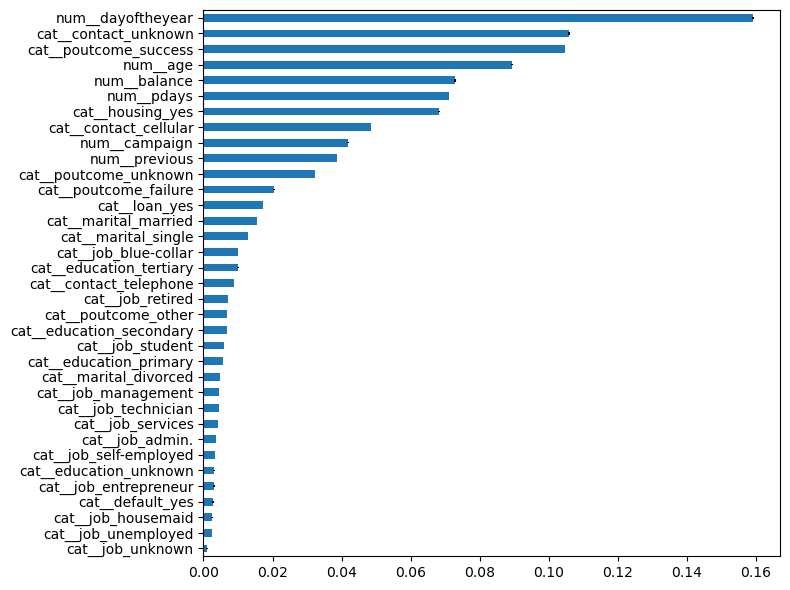

In [89]:
forest_importances = pd.Series(importances, index=rf_clf.named_steps['preprocessing'].get_feature_names_out()).sort_values()

fig, ax = plt.subplots(figsize=(8,6))
forest_importances.plot(kind='barh', yerr=std, ax=ax)
fig.tight_layout()

What is the most important feature?

dayoftheyear

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [ ]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features
from sklearn.feature_selection import RFECV

min_features_to_select = 1  # Minimum number of features to consider

rfecv = RFECV(
    estimator=RandomForestClassifier(max_depth=10, n_estimators=50, class_weight='balanced_subsample'),
    step=1,
    cv=5,
    scoring='roc_auc',
    min_features_to_select=min_features_to_select,
    n_jobs=-1
)

rf_clf = Pipeline([
    ('preprocessing', preprocessor),
    ('feature_selection', rfecv),
    ('classifier', RandomForestClassifier(max_depth=10, n_estimators=50, class_weight='balanced_subsample'))
])

rf_clf.fit(X_train, y_train)

print(f"Optimal number of features: {rf_clf.named_steps['feature_selection'].n_features_}")


,steps,"[('preprocessing', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


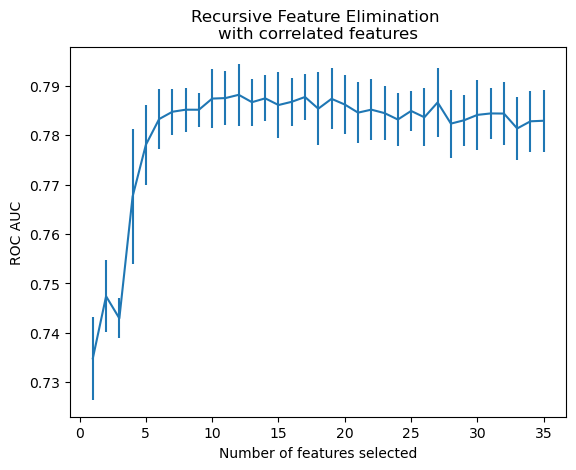

In [105]:
data = {
    key: value
    for key, value in rf_clf.named_steps['feature_selection'].cv_results_.items()
    if key in ["n_features", "mean_test_score", "std_test_score"]
}
cv_results = pd.DataFrame(data)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("ROC AUC")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [113]:
rf_clf[1].support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False,  True,  True])

In [116]:
rf_clf[1].estimators_

AttributeError: 'RFECV' object has no attribute 'estimators_'

In [109]:
importances = rf_clf.named_steps['feature_selection'].estimators_.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.named_steps['feature_selection'].estimators_], axis=0)
forest_importances = pd.Series(importances, index=rf_clf.named_steps['preprocessing'].get_feature_names_out()).sort_values()

fig, ax = plt.subplots(figsize=(8,6))
forest_importances.plot(kind='barh', yerr=std, ax=ax)
fig.tight_layout()

AttributeError: 'RFECV' object has no attribute 'estimators_'

In [107]:
cv_results

,mean_test_score,std_test_score,n_features
0,0.734832,0.008419,1
1,0.747401,0.007273,2
2,0.742933,0.004079,3
3,0.767605,0.013725,4
4,0.778072,0.008127,5
5,0.783286,0.006124,6
6,0.784762,0.004663,7
7,0.785181,0.004474,8
8,0.785172,0.003457,9
9,0.787432,0.006031,10


In [106]:
rf_clf = Pipeline([
    ('preprocessing', preprocessor),
    ('feature_selection', rfecv),
    ('classifier', RandomForestClassifier(class_weight='balanced_subsample'))
])

depth = range(1,25)
n_ins = range(10,141,20)
param_grid =  {'classifier__max_depth': depth,
               'classifier__n_estimators': n_ins}

gs_rf = GridSearchCV(estimator=rf_clf, 
                     param_grid=param_grid, 
                     scoring = 'roc_auc',
                     n_jobs = -1,
                     cv = 5
                    )

gs_rf.fit(X_train, y_train)

KeyboardInterrupt: 

We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

the previously trained models would overfit the training data.


### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [40]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [41]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [ ]:
# model building and evaluation
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
import xgboost as xgb
# Get columns list for categorical and numerical
categorical_features = df.select_dtypes('object').columns.tolist()
numerical_features = df.select_dtypes('int64').columns.tolist()
# Create a pipeline
pipe = Pipeline([
  ('preproc', PreprocTransformer(categorical_features, numerical_features)),
  ('fs', SelectKBest()),
  ('clf', xgb.XGBClassifier(objective='binary:logistic'))
])

In [ ]:
# gridsearch 
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [10],
  }
]
# Define cross validation
kfold = KFold(n_splits=10, random_state=42)
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)
# Fit grid search
model = grid.fit(X_train, y_train)

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics

In [ ]:
# performance curves

## Let's Conclude

Report your test set metrics for the three methods here

In [ ]:
# Decision Tree on test set

In [ ]:
# Random forest on test set

In [ ]:
# XGBoost on test set

What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train a new model.

In [ ]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [ ]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here